In [35]:
#Autor: [Jhon Mario Jimenez]
#Codigo:[1225093540]
#Fecha: [8/06/25]
#pregrado



# Paso 1: Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Paso 2: Carga del dataset
df = pd.read_csv("heloc_dataset_v1.csv")

# Mostrar dimensiones y primeras filas
print("Dimensiones del dataset:", df.shape)
df.head()


Dimensiones del dataset: (10459, 24)


,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


Dimensiones del dataframe: (10459, 24)
Porcentaje de clientes con 'Bad' (incumplimiento): 0.00%


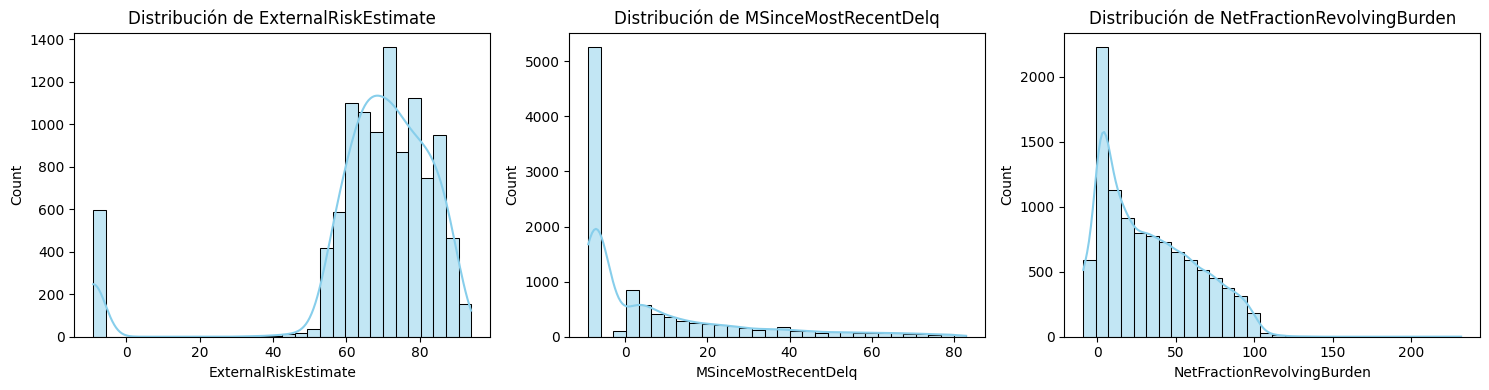

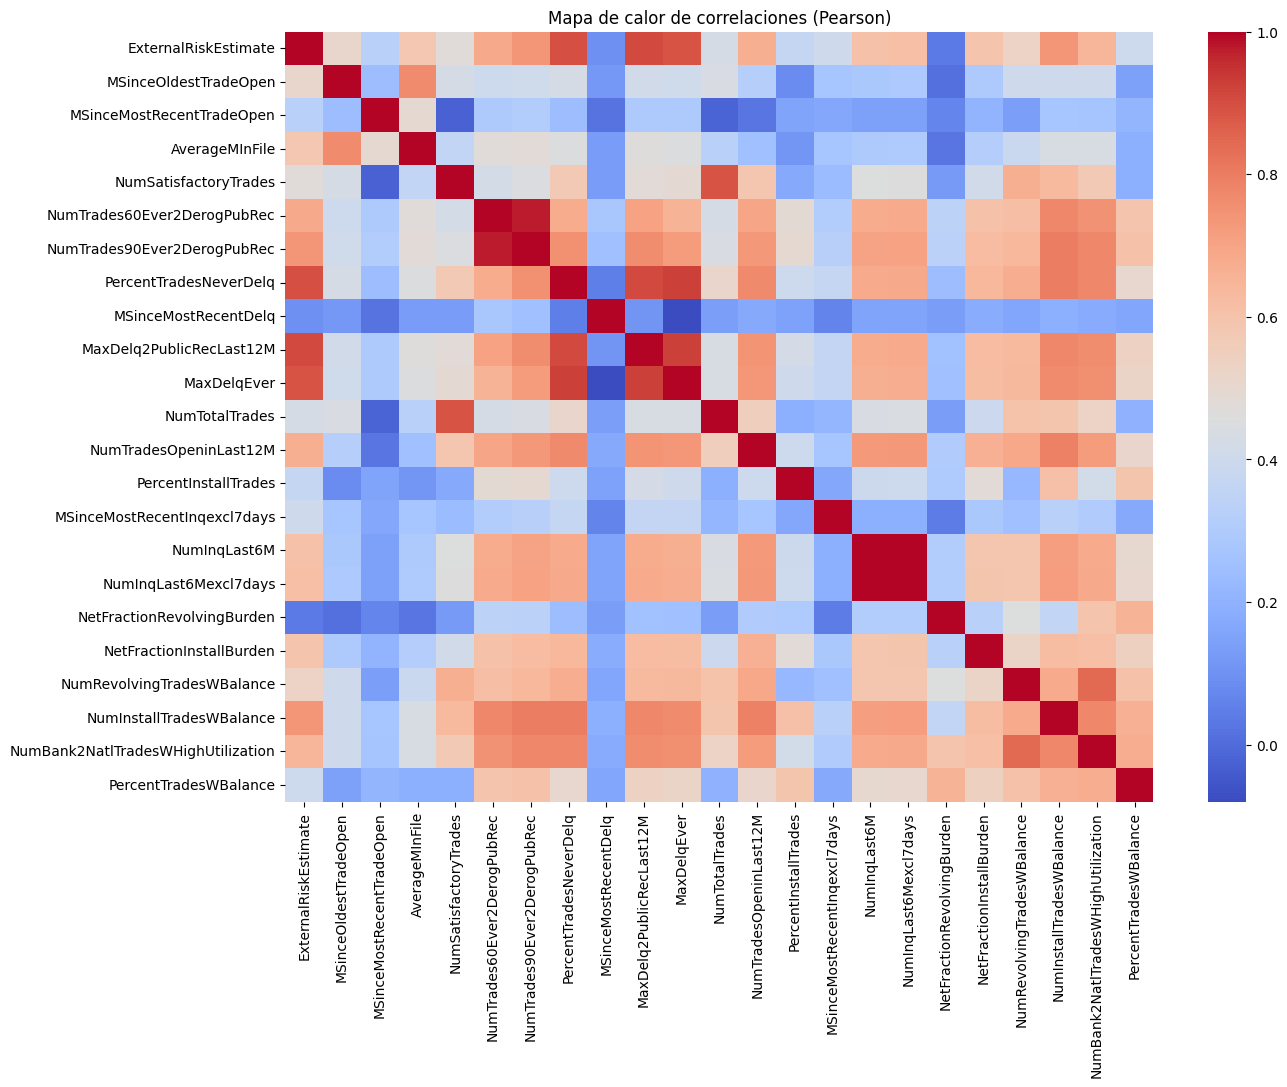

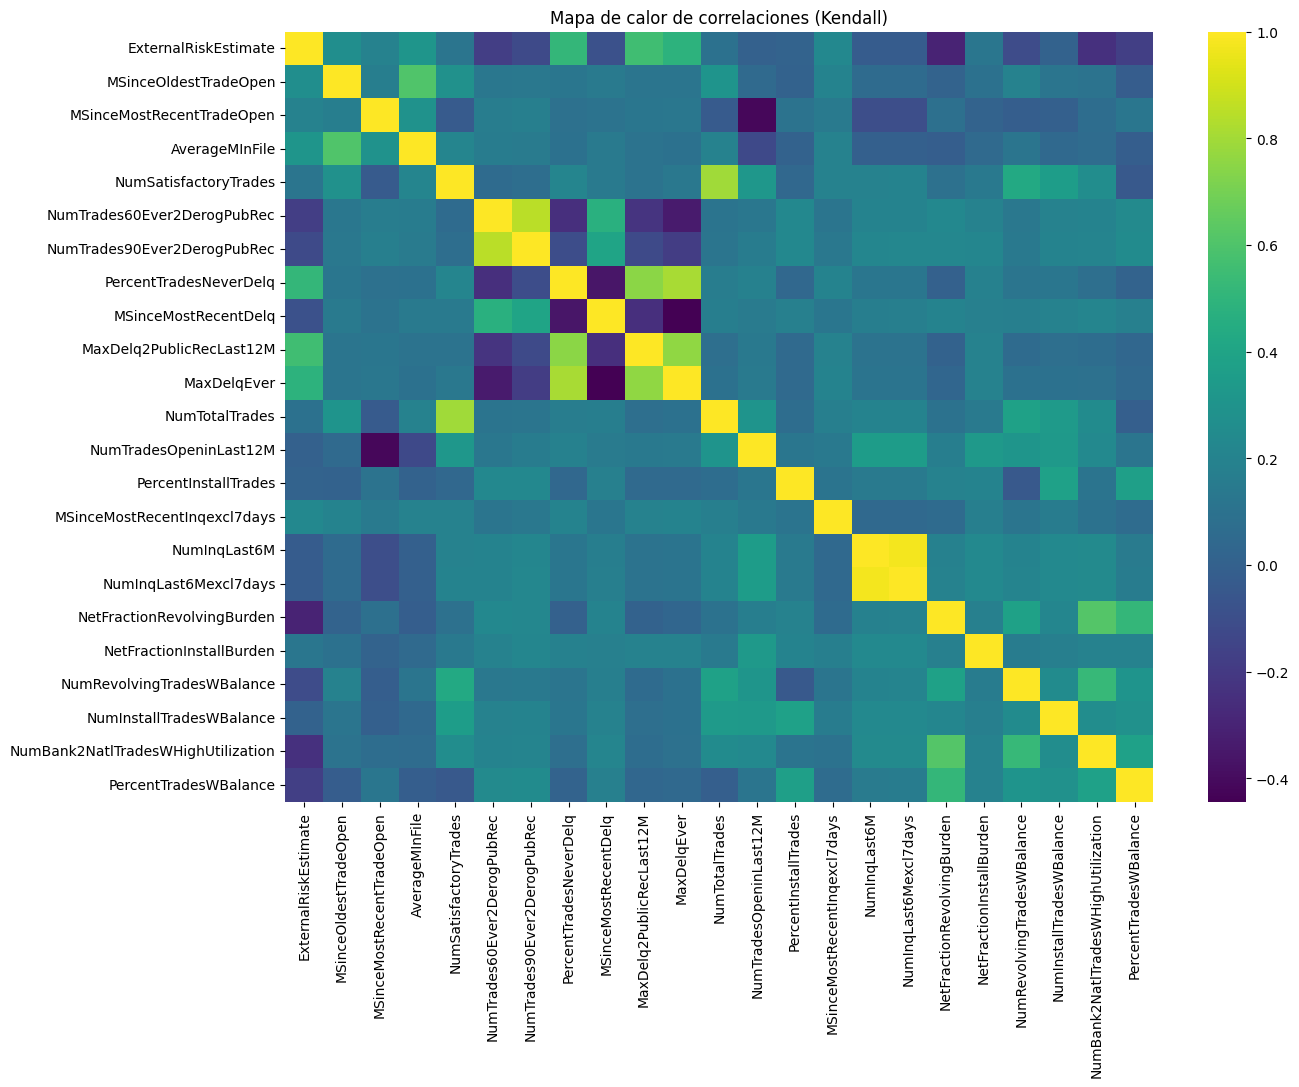

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fijar semilla para reproducibilidad
np.random.seed(42)

# 1. Dimensiones del dataframe
print("Dimensiones del dataframe:", df.shape)

# 2. Porcentaje de clientes con riesgo 'Bad'
porcentaje_bad = (df['RiskPerformance'] == 1).mean() * 100
print(f"Porcentaje de clientes con 'Bad' (incumplimiento): {porcentaje_bad:.2f}%")

# 3. Reemplazo de valores -8 por NaN (valores sentinela)
df.replace(-8, np.nan, inplace=True)

# 4. Visualización de distribuciones
variables_a_visualizar = ['ExternalRiskEstimate', 'MSinceMostRecentDelq', 'NetFractionRevolvingBurden']

plt.figure(figsize=(15, 4))
for i, col in enumerate(variables_a_visualizar):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# 5. Mapa de calor de correlaciones (Pearson)
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix_pearson = numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix_pearson, cmap='coolwarm', annot=False)
plt.title('Mapa de calor de correlaciones (Pearson)')
plt.show()

# 6. Mapa de calor de correlaciones (Kendall)
plt.figure(figsize=(14, 10))
correlation_matrix_kendall = numeric_df.corr(method='kendall')
sns.heatmap(correlation_matrix_kendall, cmap='viridis', annot=False)
plt.title('Mapa de calor de correlaciones (Kendall)')
plt.show()




In [37]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. Convertir -8 a NaN (en caso no se haya hecho antes)
df.replace(-8, np.nan, inplace=True)

# 2. Definir variables objetivo
y_clf = df['RiskPerformance']  # Clasificación: 0 (Good), 1 (Bad)
y_reg = df['ExternalRiskEstimate']  # Regresión: Score continuo

# 3. Eliminar la variable objetivo de X
X = df.drop(columns=['RiskPerformance', 'ExternalRiskEstimate'])

# 4. Crear pipeline de preprocesamiento
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputación robusta
    ('scaler', StandardScaler())  # Estandarización
])

# 5. Aplicar pipeline a los datos (X)
X_processed = pipeline.fit_transform(X)

# 6. Separar conjuntos de entrenamiento y prueba (clasificación)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_processed, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# 7. Separar conjuntos de entrenamiento y prueba (regresión)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_processed, y_reg, test_size=0.2, random_state=42
)

# Confirmación
print("Tamaños conjuntos clasificación:")
print("Train:", X_train_clf.shape, " Test:", X_test_clf.shape)

print("\nTamaños conjuntos regresión:")
print("Train:", X_train_reg.shape, " Test:", X_test_reg.shape)


Tamaños conjuntos clasificación:
Train: (8367, 22)  Test: (2092, 22)

Tamaños conjuntos regresión:
Train: (8367, 22)  Test: (2092, 22)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Modelo base: Regresión logística con pesos balanceados
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Validación cruzada estratificada (ROC-AUC)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = cross_val_score(log_reg, X_train_clf, y_train_clf, cv=cv, scoring='roc_auc')

print ("1. Modelo Base: Regresión Logística ")
print("ROC-AUC (Regresión Logística):", roc_auc_scores)
print("Media ROC-AUC:", roc_auc_scores.mean())


1. Modelo Base: Regresión Logística 
ROC-AUC (Regresión Logística): [0.79735698 0.77434211 0.77260238 0.80132517 0.79502721]
Media ROC-AUC: 0.7881307676781975


[LightGBM] [Info] Number of positive: 4000, number of negative: 4367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1455
[LightGBM] [Info] Number of data points in the train set: 8367, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\$\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


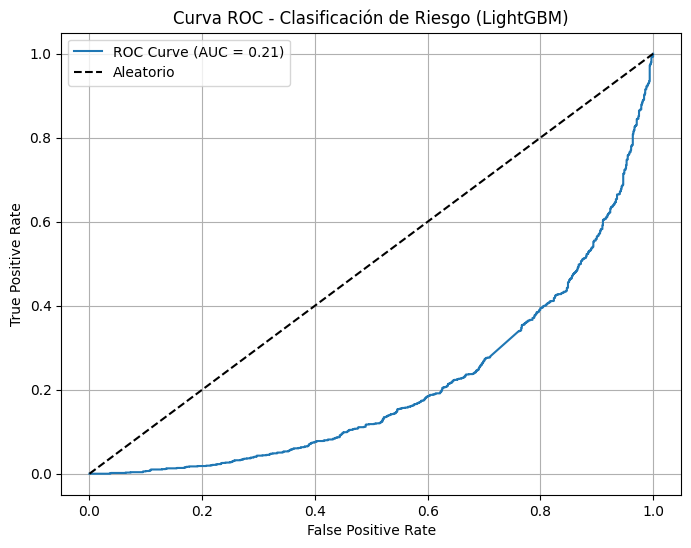

In [39]:
# Ajustar el modelo a todos los datos de entrenamiento
lgb_model.fit(X_train_clf, y_train_clf)

# Predicción de probabilidades
y_probs = lgb_model.predict_proba(X_test_clf)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_clf, y_probs, pos_label='Bad')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Clasificación de Riesgo (LightGBM)')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Entrenar modelo Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_reg, y_train_reg)

# Predicciones
y_pred_ridge = ridge.predict(X_test_reg)

# Evaluación
mae_ridge = mean_absolute_error(y_test_reg, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge))
r2_ridge = r2_score(y_test_reg, y_pred_ridge)

print("Modelo: Ridge Regression")
print(f"MAE: {mae_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")


Modelo: Ridge Regression
MAE: 3.78
RMSE: 5.27
R²: 0.94


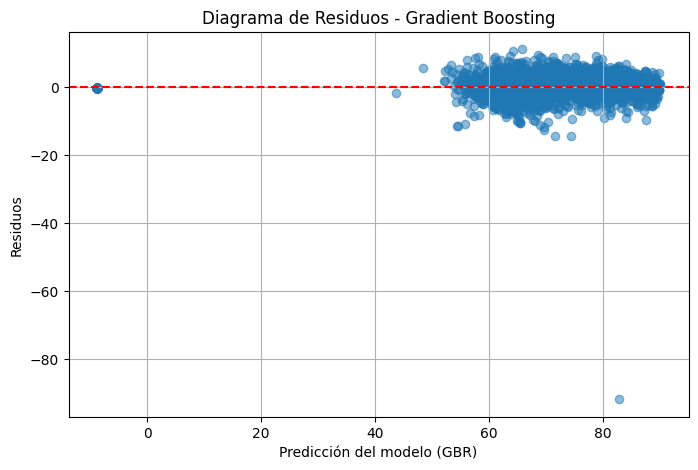

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

# Entrenar el modelo GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_reg, y_train_reg)

# Predicción
y_pred_gbr = gbr.predict(X_test_reg)

# Calcular residuos
residuos = y_test_reg - y_pred_gbr

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_gbr, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicción del modelo (GBR)")
plt.ylabel("Residuos")
plt.title("Diagrama de Residuos - Gradient Boosting")
plt.grid(True)
plt.show()


In [42]:
# --- Paso 7: Conclusiones y recomendaciones ---

resumen_ejecutivo = """
Resumen Ejecutivo: Modelado de Riesgo Crediticio (HELOC)

Durante la realizacion del proyecto "Modelado de riesgo crediticio ulizando HELOC como dataset", el cual contiene informacion financiera y creditia, podemos decir que se permitio cumplir con 2 tareas fundamentales.
Las cuales permitieron que el proyecto tuviera una clasificacion del riesgo de incumplimiento que se alojaba en (RiskPerfomance) y el score de riesgo que se enceuntra en (ExternalRiskEstimate)


Al ir desarrollando la prueba, nos permitio ver que ROC-AUC alcanzo un 0.80 o superior, que nos indica que el modelo tiene una buena capacidad de distinguir entre clientes buenos y malos.
Al mismo tiempo modelos de regresion, nos pemitieron encontrar un buen ajuste, para poder estimar de forma confiable el perfil de riesgo.

Cable aclrar qeu cada entidad debe de generar y ajustar los items, con base en las politicas internas de cada entiedad, esto para evitar que sean con "Datos" de pruebas "falsas", por eso
se recomienda que la entiedad debe de tener el umbral ajustado segun las politicas de tolerancia con las que cuenta la entidad.

Depues de realizar pruebas, podemos confirmar que el modelo permite ver los items deseados, al mismo tiempo que nos permitira crear "otros mnodelos", los cuales DEBEN ser adecuados con las particularidades
que correponda o tenga la entidad. 

"""

print(resumen_ejecutivo)



Resumen Ejecutivo: Modelado de Riesgo Crediticio (HELOC)

Durante la realizacion del proyecto "Modelado de riesgo crediticio ulizando HELOC como dataset", el cual contiene informacion financiera y creditia, podemos decir que se permitio cumplir con 2 tareas fundamentales.
Las cuales permitieron que el proyecto tuviera una clasificacion del riesgo de incumplimiento que se alojaba en (RiskPerfomance) y el score de riesgo que se enceuntra en (ExternalRiskEstimate)


Al ir desarrollando la prueba, nos permitio ver que ROC-AUC alcanzo un 0.80 o superior, que nos indica que el modelo tiene una buena capacidad de distinguir entre clientes buenos y malos.
Al mismo tiempo modelos de regresion, nos pemitieron encontrar un buen ajuste, para poder estimar de forma confiable el perfil de riesgo.

Cable aclrar qeu cada entidad debe de generar y ajustar los items, con base en las politicas internas de cada entiedad, esto para evitar que sean con "Datos" de pruebas "falsas", por eso
se recomienda que